In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
accepted = pd.read_csv('C:/Users/nisha/Documents/DATA 903/Machine Learning/lending-club/accepted_2007_to_2017Q3.csv.gz',compression='gzip', low_memory=True)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
accepted.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#create new data frame for manipulation
df2 = accepted.copy()

In [5]:
#dropping colums that have a percentage of missing values greater than 40% of the column size

def drop_nulls(df1,column):
    ## setting threshhold for which above the threshhold if nulls are present, the column will get deleted ##
    colnulls= df1[column].isnull().sum() 
    leng = len(df1) 
    perc = (colnulls / leng) * 100
    if perc >= 40:
        del df1[column]

In [6]:
#dropping columns that have missing values greater than or equal to 40%

print("Original shape of the DataFrame:" +str(df2.shape))
for i in df2.columns:
    drop_nulls(df2,i)
print("Reduced shape of DataFrame: " + str(df2.shape))

Original shape of the DataFrame:(1646801, 150)
Reduced shape of DataFrame: (1646801, 92)


In [7]:
#Exploratory analysis
print(df2.isnull().sum())
for i in df2.columns:
    print("The nulls in column " + i +" "+ "are : " +str(df2[i].isnull().sum()))
    print("The data type of the columns is: " +str(df2[i].dtype))
    print("Number of unique values in the column are: " +str(len(df2[i].unique())))
    print("The count of the values in that column are: \n" +str(df2[i].value_counts()))#.sort_index().plot(kind='bar')
    #plt.show()
    print("\n")

id                                 0
loan_amnt                         23
funded_amnt                       23
funded_amnt_inv                   23
term                              23
int_rate                          23
installment                       23
grade                             23
sub_grade                         23
emp_title                     102464
emp_length                     95221
home_ownership                    23
annual_inc                        27
verification_status               23
issue_d                           23
loan_status                       23
pymnt_plan                        23
purpose                           23
title                          23348
zip_code                          24
addr_state                        23
dti                              380
delinq_2yrs                       52
earliest_cr_line                  52
fico_range_low                    23
fico_range_high                   23
inq_last_6mths                    53
o

The nulls in column installment are : 23
The data type of the columns is: float64
Number of unique values in the column are: 85532
The count of the values in that column are: 
301.15     3750
327.34     3353
332.10     3262
361.38     2779
451.73     2672
602.30     2662
329.72     2612
318.79     2309
392.81     2196
491.01     2194
312.86     2194
240.92     2087
336.90     1981
163.67     1956
341.73     1951
654.68     1948
166.05     1940
498.15     1927
150.58     1911
261.88     1870
164.86     1868
196.41     1856
398.52     1830
664.20     1798
180.69     1775
752.87     1735
197.83     1730
375.43     1717
265.68     1708
199.26     1694
           ... 
1104.64       1
1114.39       1
477.73        1
533.63        1
826.35        1
1105.89       1
1110.11       1
736.61        1
220.57        1
1105.64       1
466.02        1
826.60        1
529.12        1
830.65        1
1112.11       1
1119.39       1
829.85        1
1115.11       1
741.89        1
69.71         1
478.73  

Number of unique values in the column are: 10
The count of the values in that column are: 
Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
Name: loan_status, dtype: int64


The nulls in column pymnt_plan are : 23
The data type of the columns is: object
Number of unique values in the column are: 3
The count of the values in that column are: 
n    1645863
y        915
Name: pymnt_plan, dtype: int64


The nulls in column purpose are : 23
The data type of the columns is: object
Number of u

Number of unique values in the column are: 734
The count of the values in that column are: 
Aug-2001    11372
Sep-2003    11227
Aug-2002    11163
Sep-2004    10902
Aug-2000    10817
Sep-2002    10784
Aug-2003    10736
Oct-2001    10567
Oct-2003    10419
Oct-2002    10357
Oct-2000    10305
Aug-2004    10249
Sep-2005     9802
Sep-2000     9771
Nov-1999     9748
Nov-2000     9665
Jul-2003     9647
Oct-2004     9592
Sep-2001     9587
Oct-1999     9416
Aug-2005     9322
Aug-1999     9244
Nov-2001     9228
Sep-1999     9145
Jul-2001     8961
Jul-2002     8920
Aug-2006     8914
Mar-2001     8747
Jul-2004     8726
Dec-2001     8703
            ...  
May-1953        1
Feb-1957        1
Feb-1934        1
Nov-1950        1
Dec-1946        1
Feb-1945        1
Sep-1957        1
Jan-1946        1
May-1957        1
Aug-1951        1
Aug-1953        1
Nov-1952        1
Jul-1955        1
Sep-1951        1
Mar-1954        1
Jun-1949        1
Aug-1955        1
Aug-1957        1
Oct-1954        1
Jun-1952

The nulls in column initial_list_status are : 23
The data type of the columns is: object
Number of unique values in the column are: 3
The count of the values in that column are: 
w    1011420
f     635358
Name: initial_list_status, dtype: int64


The nulls in column out_prncp are : 23
The data type of the columns is: float64
Number of unique values in the column are: 351823
The count of the values in that column are: 
0.00        817867
9065.57        252
4641.48        235
9057.25        229
9036.27        219
9042.83        211
9282.95        197
9029.64        186
9270.14        185
9285.38        184
9280.34        183
9078.33        180
9296.47        173
8825.79        166
11588.99       166
6962.11        165
9109.69        164
8773.94        162
7039.68        161
5569.77        159
9302.86        154
5975.25        151
6777.37        150
8815.65        149
9023.01        149
9275.24        147
7725.93        145
8841.35        145
9002.87        143
8790.09        143
        

Number of unique values in the column are: 82542
The count of the values in that column are: 
0.00        1540672
50.00           388
100.00          375
200.00          264
25.00           159
300.00          146
150.00          144
400.00           96
500.00           94
0.24             88
0.12             80
0.30             77
0.36             76
0.16             71
250.00           70
600.00           67
0.06             65
0.72             62
0.18             62
0.60             61
0.20             61
0.08             58
0.15             57
1000.00          57
0.40             55
1.20             53
0.48             52
0.10             49
75.00            49
700.00           49
             ...   
2694.47           1
1562.46           1
588.55            1
4943.87           1
814.54            1
1065.52           1
11605.29          1
725.19            1
1065.02           1
1062.98           1
1541.29           1
1561.96           1
4929.62           1
186.65            1
2703.5

The count of the values in that column are: 
690.0    67088
695.0    64950
700.0    64465
680.0    63455
705.0    63274
685.0    61872
710.0    60552
715.0    57806
675.0    57277
670.0    55583
720.0    54932
725.0    48205
665.0    47753
730.0    46392
660.0    41892
735.0    38782
740.0    36541
655.0    35113
745.0    30668
650.0    30323
750.0    29406
755.0    26389
645.0    25841
640.0    23031
760.0    22773
765.0    22100
0.0      21759
770.0    19364
635.0    19331
775.0    19061
         ...  
590.0    11814
800.0    11484
580.0    11309
595.0    11287
570.0    11160
560.0    10935
585.0    10788
565.0    10615
550.0    10600
575.0    10470
555.0    10194
540.0    10155
545.0     9730
805.0     9615
535.0     9023
530.0     8871
520.0     7780
525.0     7646
810.0     7488
515.0     6738
510.0     6536
815.0     6345
505.0     5692
500.0     5266
820.0     4473
825.0     3292
830.0     2072
835.0      962
840.0      547
845.0      223
Name: last_fico_range_low, Length: 71, d

Number of unique values in the column are: 78573
The count of the values in that column are: 
0.0         26622
500.0        1352
2000.0       1311
1000.0       1178
3000.0       1117
2500.0       1028
1500.0        988
5000.0        926
4000.0        850
3500.0        838
300.0         744
800.0         621
4500.0        613
6000.0        542
1300.0        494
1750.0        490
200.0         482
2250.0        482
105.0         471
1800.0        470
88.0          464
1200.0        462
106.0         461
83.0          461
107.0         455
5500.0        454
100.0         453
700.0         453
2750.0        452
74.0          451
            ...  
110027.0        1
63906.0         1
94106.0         1
63903.0         1
63901.0         1
100079.0        1
63899.0         1
63896.0         1
63918.0         1
58448.0         1
94100.0         1
63923.0         1
63950.0         1
110081.0        1
63947.0         1
45655.0         1
103692.0        1
63943.0         1
63942.0         1
63941.

Number of unique values in the column are: 501
The count of the values in that column are: 
3.0      77218
2.0      75523
4.0      73646
5.0      69372
6.0      64784
7.0      61812
8.0      58030
9.0      53972
10.0     50739
1.0      50586
11.0     48436
12.0     46299
13.0     44483
14.0     41735
15.0     37923
16.0     34683
17.0     31436
18.0     29455
19.0     27750
20.0     26064
21.0     24666
22.0     23426
23.0     22059
24.0     20980
25.0     19510
26.0     17888
27.0     16841
28.0     15860
29.0     14765
30.0     14019
         ...  
395.0        1
405.0        1
406.0        1
410.0        1
414.0        1
415.0        1
421.0        1
426.0        1
429.0        1
434.0        1
438.0        1
512.0        1
450.0        1
453.0        1
461.0        1
463.0        1
466.0        1
467.0        1
470.0        1
472.0        1
474.0        1
475.0        1
476.0        1
480.0        1
507.0        1
482.0        1
483.0        1
485.0        1
639.0        1
510.0   

The count of the values in that column are: 
10.0     94069
11.0     93095
9.0      92444
12.0     89956
8.0      89281
13.0     85766
7.0      82980
14.0     79551
15.0     74211
6.0      72621
16.0     68384
17.0     62098
5.0      58946
18.0     55535
19.0     50355
20.0     44499
4.0      43590
21.0     39237
22.0     34903
23.0     30368
24.0     26895
3.0      26349
25.0     23146
26.0     19980
27.0     17433
28.0     15244
29.0     13229
30.0     11335
2.0      11310
31.0      9803
         ...  
90.0         6
86.0         6
82.0         5
92.0         5
78.0         5
93.0         4
96.0         4
88.0         3
89.0         3
101.0        3
112.0        2
83.0         2
100.0        2
103.0        2
85.0         2
87.0         2
91.0         2
107.0        2
104.0        2
108.0        1
0.0          1
105.0        1
128.0        1
102.0        1
118.0        1
98.0         1
127.0        1
94.0         1
143.0        1
113.0        1
Name: num_rev_accts, Length: 111, dtype:

The count of the values in that column are: 
17500.0     488
15500.0     487
16500.0     485
16000.0     472
12500.0     468
14000.0     467
19000.0     464
13500.0     461
15000.0     457
18000.0     457
13800.0     457
14500.0     451
17000.0     450
13000.0     448
11500.0     445
12000.0     442
20300.0     436
18500.0     434
17700.0     434
10500.0     433
19800.0     431
9000.0      431
15800.0     429
20000.0     429
10000.0     428
11000.0     428
19500.0     427
21000.0     425
22000.0     420
16300.0     418
           ... 
523246.0      1
311074.0      1
345072.0      1
523208.0      1
523197.0      1
523193.0      1
311140.0      1
523137.0      1
311170.0      1
311169.0      1
311166.0      1
311160.0      1
523140.0      1
523146.0      1
311151.0      1
311144.0      1
311143.0      1
523175.0      1
311119.0      1
523179.0      1
523182.0      1
523183.0      1
311134.0      1
311130.0      1
311128.0      1
523188.0      1
523191.0      1
311121.0      1
109138.0   

In [15]:
df3 = df2.copy()

In [16]:
#df3.columns

# Feature Selection

In [17]:
keeps = ['loan_amnt','term', 'int_rate',
       'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 
       'inq_last_6mths', 'open_acc', 
       'initial_list_status',
       'recoveries','fico_range_high','fico_range_low',
       'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt',
       'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'pct_tl_nvr_dlq', 'pub_rec_bankruptcies','hardship_flag', 'disbursement_method',
       'debt_settlement_flag']

df3 = df3[keeps]

In [18]:
df3.head(5)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,inq_last_6mths,open_acc,initial_list_status,recoveries,fico_range_high,fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_bc,mths_since_recent_inq,pct_tl_nvr_dlq,pub_rec_bankruptcies,hardship_flag,disbursement_method,debt_settlement_flag
0,15000.0,60 months,12.39,10+ years,RENT,78000.0,Source Verified,Fully Paid,n,debt_consolidation,VA,12.03,0.0,6.0,w,0.00,754.0,750.0,0.0,Individual,0.0,0.0,4.7,0.0,0.0,0.0,47.0,NaN,100.0,0.0,N,Cash,N
1,10400.0,36 months,6.99,8 years,MORTGAGE,58000.0,Not Verified,Charged Off,n,credit_card,CA,14.92,2.0,17.0,w,521.27,714.0,710.0,0.0,Individual,0.0,0.0,41.5,0.0,0.0,1.0,5.0,1.0,83.3,0.0,N,Cash,N
2,21425.0,60 months,15.59,6 years,RENT,63800.0,Source Verified,Fully Paid,n,credit_card,MO,18.49,0.0,10.0,w,0.00,689.0,685.0,0.0,Individual,0.0,0.0,97.8,0.0,0.0,0.0,7.0,7.0,91.4,0.0,N,Cash,N
3,12800.0,60 months,17.14,10+ years,MORTGAGE,125000.0,Verified,Current,n,car,CA,8.31,0.0,8.0,w,0.00,669.0,665.0,0.0,Individual,0.0,0.0,103.2,0.0,0.0,5.0,21.0,1.0,76.9,0.0,N,Cash,N
4,7650.0,36 months,13.66,< 1 year,RENT,50000.0,Source Verified,Charged Off,n,debt_consolidation,AZ,34.81,1.0,11.0,f,1237.99,689.0,685.0,0.0,Individual,0.0,0.0,93.2,0.0,0.0,0.0,17.0,3.0,100.0,0.0,N,Cash,N


In [12]:
#Outlier analysis - keepings entries for interest rates that lie within the 25th and 75th quantiles

df3['test'] = np.where(np.logical_or(df3['int_rate'] <= 9.76, df3['int_rate'] > 15.99), 1,0)

df3['test'].value_counts()

df3 = df3[df3['test'] == 0] #outlier free

In [13]:
df3 = df3.drop('test', axis=1)

In [19]:
print(df3.shape)
df3 = df3.dropna(axis=0)
print(df3.shape)

(1646801, 33)
(1314979, 33)


In [20]:
#creating the mean FICO

df3['fico_range'] = df3.fico_range_low.astype('str') + '-' + df3.fico_range_high.astype('str')
df3['meanfico'] = (df3.fico_range_low + df3.fico_range_high)/2

df3 = df3.drop(['fico_range_high','fico_range_low','fico_range'], axis=1)

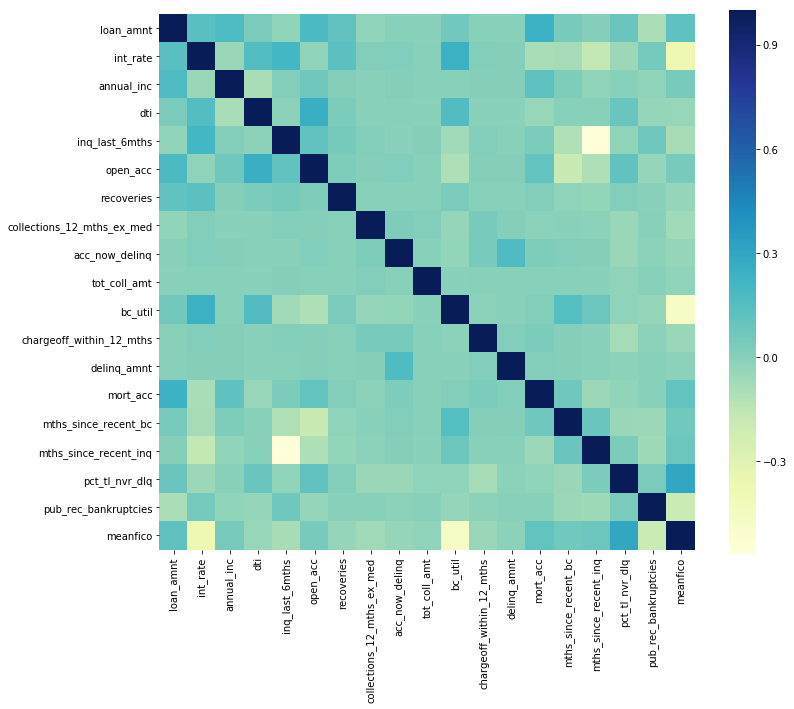

In [21]:
#checking the correlation amongst the columns - there is one hence it can be deleted

corr = df3.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, ax=ax, cmap="YlGnBu")
plt.axis('image')
plt.show()

In [22]:
df3.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,inq_last_6mths,open_acc,initial_list_status,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_bc,mths_since_recent_inq,pct_tl_nvr_dlq,pub_rec_bankruptcies,hardship_flag,disbursement_method,debt_settlement_flag,meanfico
1,10400.0,36 months,6.99,8 years,MORTGAGE,58000.0,Not Verified,Charged Off,n,credit_card,CA,14.92,2.0,17.0,w,521.27,0.0,Individual,0.0,0.0,41.5,0.0,0.0,1.0,5.0,1.0,83.3,0.0,N,Cash,N,712.0
2,21425.0,60 months,15.59,6 years,RENT,63800.0,Source Verified,Fully Paid,n,credit_card,MO,18.49,0.0,10.0,w,0.00,0.0,Individual,0.0,0.0,97.8,0.0,0.0,0.0,7.0,7.0,91.4,0.0,N,Cash,N,687.0
3,12800.0,60 months,17.14,10+ years,MORTGAGE,125000.0,Verified,Current,n,car,CA,8.31,0.0,8.0,w,0.00,0.0,Individual,0.0,0.0,103.2,0.0,0.0,5.0,21.0,1.0,76.9,0.0,N,Cash,N,667.0
4,7650.0,36 months,13.66,< 1 year,RENT,50000.0,Source Verified,Charged Off,n,debt_consolidation,AZ,34.81,1.0,11.0,f,1237.99,0.0,Individual,0.0,0.0,93.2,0.0,0.0,0.0,17.0,3.0,100.0,0.0,N,Cash,N,687.0
5,9600.0,36 months,13.66,10+ years,RENT,69000.0,Source Verified,Fully Paid,n,debt_consolidation,NJ,25.81,0.0,12.0,f,0.00,0.0,Individual,0.0,0.0,69.2,0.0,0.0,0.0,24.0,17.0,100.0,0.0,N,Cash,N,682.0


In [23]:
#printing columns that have "object" datatype
df_cat = df3.select_dtypes(include=['object'])

In [24]:
df_cat.head()

,term,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
1,36 months,8 years,MORTGAGE,Not Verified,Charged Off,n,credit_card,CA,w,Individual,N,Cash,N
2,60 months,6 years,RENT,Source Verified,Fully Paid,n,credit_card,MO,w,Individual,N,Cash,N
3,60 months,10+ years,MORTGAGE,Verified,Current,n,car,CA,w,Individual,N,Cash,N
4,36 months,< 1 year,RENT,Source Verified,Charged Off,n,debt_consolidation,AZ,f,Individual,N,Cash,N
5,36 months,10+ years,RENT,Source Verified,Fully Paid,n,debt_consolidation,NJ,f,Individual,N,Cash,N


In [25]:
nominal_cols = df_cat.columns

In [26]:
y = pd.DataFrame(df3['int_rate'])

In [27]:
df3 = df3.drop('int_rate', axis=1)

In [28]:
#keeping only continuous and nominal category variables

dummy_df = pd.DataFrame(pd.get_dummies(df_cat))

In [29]:
dummy_df.head(5)

,term_ 36 months,term_ 60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [30]:
df3 = df3.drop(nominal_cols, axis=1)
df_main = pd.DataFrame(pd.concat([df3, dummy_df], axis=1))

In [31]:
df_main.head(5)

,loan_amnt,annual_inc,dti,inq_last_6mths,open_acc,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_bc,mths_since_recent_inq,pct_tl_nvr_dlq,pub_rec_bankruptcies,meanfico,term_ 36 months,term_ 60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
1,10400.0,58000.0,14.92,2.0,17.0,521.27,0.0,0.0,0.0,41.5,0.0,0.0,1.0,5.0,1.0,83.3,0.0,712.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2,21425.0,63800.0,18.49,0.0,10.0,0.00,0.0,0.0,0.0,97.8,0.0,0.0,0.0,7.0,7.0,91.4,0.0,687.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
3,12800.0,125000.0,8.31,0.0,8.0,0.00,0.0,0.0,0.0,103.2,0.0,0.0,5.0,21.0,1.0,76.9,0.0,667.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
4,7650.0,50000.0,34.81,1.0,11.0,1237.99,0.0,0.0,0.0,93.2,0.0,0.0,0.0,17.0,3.0,100.0,0.0,687.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
5,9600.0,69000.0,25.81,0.0,12.0,0.00,0.0,0.0,0.0,69.2,0.0,0.0,0.0,24.0,17.0,100.0,0.0,682.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [32]:
X = df_main.copy()

In [33]:
#X = X.as_matrix()
#y = y.as_matrix()

In [34]:
print(X.shape)
print(y.shape)

(1314979, 124)
(1314979, 1)


In [35]:
#splitting the test and train sets, keeping validation set untouched

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [36]:
X_train.head()

,loan_amnt,annual_inc,dti,inq_last_6mths,open_acc,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_bc,mths_since_recent_inq,pct_tl_nvr_dlq,pub_rec_bankruptcies,meanfico,term_ 36 months,term_ 60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
687594,10000.0,105000.0,13.58,2.0,15.0,0.0,0.0,0.0,332.0,64.1,0.0,0.0,0.0,19.0,5.0,100.0,0.0,677.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1584724,21000.0,60265.0,20.88,1.0,14.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,1.0,13.0,2.0,97.6,0.0,712.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
416128,21000.0,86000.0,20.72,1.0,18.0,0.0,0.0,0.0,0.0,76.3,0.0,0.0,0.0,39.0,3.0,100.0,0.0,692.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
405324,13000.0,32500.0,35.78,0.0,6.0,0.0,0.0,0.0,0.0,96.1,0.0,0.0,0.0,29.0,9.0,100.0,0.0,692.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1552144,15000.0,170000.0,26.06,2.0,31.0,0.0,0.0,0.0,0.0,71.9,0.0,0.0,4.0,6.0,0.0,100.0,0.0,752.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0


In [37]:
y_train.head()

,int_rate
687594,13.66
1584724,7.39
416128,8.18
405324,18.25
1552144,5.32


In [38]:
#standardizing X
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [39]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import numpy as np


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [40]:
dim1 = X_train.shape[1]

from keras.optimizers import RMSprop

Early_stopping_monitor = EarlyStopping(patience=3) 
#rmsprop = RMSprop(lr=0.01)
# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(20, input_dim=dim1, activation='relu'))

# Add one hidden layer 
model.add(Dense(20, activation='relu'))

# Add an output layer 
model.add(Dense(1))

#compile
model.compile(optimizer='adam', loss='mse')

In [48]:
from keras.callbacks import TensorBoard

In [50]:
#model fit

model.fit(X_train, y_train, epochs=5, callbacks=[TensorBoard(log_dir='C:/temp/903')])

Epoch 1/5
1051983/1051983 [==============================] - 60s 57us/step - loss: 10.7592
Epoch 2/5
1051983/1051983 [==============================] - 60s 57us/step - loss: 10.7106
Epoch 3/5
1051983/1051983 [==============================] - 61s 58us/step - loss: 10.7141
Epoch 4/5
1051983/1051983 [==============================] - 61s 58us/step - loss: 10.7106
Epoch 5/5
1051983/1051983 [==============================] - 63s 60us/step - loss: 10.7189


In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred[:5]

array([[14.797803 ],
       [12.752693 ],
       [15.108028 ],
       [15.7549715],
       [11.020517 ]], dtype=float32)

In [44]:
y_test[:5]

,int_rate
288391,18.99
1088496,14.99
836599,16.20
899087,19.05
47886,12.99


In [45]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5213384514331662